## Data aggregation

Goal: create 1 dataset with relevant synthesis parameters and measurement outcomes for everything I've made

Columns in output: UUID, volume fractions of everything, fit results processed with Null if version wasn't best

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np

## Load synthesis files

In [3]:
synthesis_files = ['/home/bgpelkie/Code/silica-np-synthesis/2024_10_04_RandomBaseline_v2/Sample_table_2024_10_04_randomsampleV2.csv', 
                   '/home/bgpelkie/Code/silica-np-synthesis/2024_10_07_randomSampleV3/Sample_table_2024_10_07_randomsampleV3.csv', 
                   '/home/bgpelkie/Code/silica-np-synthesis/2024_10_17_RandomBaselineV4/Sample_table_2024_10_17_RandomBaselineV4.csv',
                   '/home/bgpelkie/Code/silica-np-synthesis/2024_12_09_DistCompare_round1/Sample_table_2024_12_09_CompareOptRound1_apdist.csv',
                   '/home/bgpelkie/Code/silica-np-synthesis/2024_12_09_DistCompare_round1/Sample_table_2024_12_09_CompareOptRound1_rmsedist.csv',
                   '/home/bgpelkie/Code/silica-np-synthesis/2024_12_11_DistCompare_round2/Sample_table_2024_12_11_CompareOptRound2_apdist.csv',
                   '/home/bgpelkie/Code/silica-np-synthesis/2024_12_11_DistCompare_round2/Sample_table_2024_12_11_compareOptRound2_rmse.csv'] 

In [6]:
fp2name = {'/home/bgpelkie/Code/silica-np-synthesis/2024_10_07_randomSampleV3/Sample_table_2024_10_07_randomsampleV3.csv':'2024_10_07_randomSampleV3', 
           '/home/bgpelkie/Code/silica-np-synthesis/2024_10_04_RandomBaseline_v2/Sample_table_2024_10_04_randomsampleV2.csv':'2024_10_04_RandomBaseline_v2', 
           '/home/bgpelkie/Code/silica-np-synthesis/2024_10_17_RandomBaselineV4/Sample_table_2024_10_17_RandomBaselineV4.csv':'2024_10_17_RandomBaselineV4',
           '/home/bgpelkie/Code/silica-np-synthesis/2024_12_09_DistCompare_round1/Sample_table_2024_12_09_CompareOptRound1_apdist.csv':'2024_12_09_OptComp1_apdist',
           '/home/bgpelkie/Code/silica-np-synthesis/2024_12_09_DistCompare_round1/Sample_table_2024_12_09_CompareOptRound1_rmsedist.csv':'2024_12_09_OptComp1_rmse',
           '/home/bgpelkie/Code/silica-np-synthesis/2024_12_11_DistCompare_round2/Sample_table_2024_12_11_CompareOptRound2_apdist.csv':'2024_12_12_OptComp2_apdist',
           '/home/bgpelkie/Code/silica-np-synthesis/2024_12_11_DistCompare_round2/Sample_table_2024_12_11_compareOptRound2_rmse.csv':'2024_12_12_OptComp2_rmse'
          }



## split apdist and rmse uuids

In [7]:
random_files = ['2024_10_07_randomSampleV3', '2024_10_04_RandomBaseline_v2', '2024_10_17_RandomBaselineV4']
apdist_files = ['2024_12_09_OptComp1_apdist', '2024_12_12_OptComp2_apdist']
rmse_files = ['2024_12_09_OptComp1_rmse', '2024_12_12_OptComp2_rmse']

In [8]:
synth_tables = []

random_uuids = []
apdist_uuids = []
rmse_uuids = []

count = 0
for fp in synthesis_files:
    data= pd.read_csv(fp)
    name = fp2name[fp]
    data['campaign'] = [name]*len(data)
    synth_tables.append(data)
    count += len(data)
    if name in random_files:
        random_uuids.extend(list(data['uuid']))
    if name in apdist_files:
        apdist_uuids.extend(list(data['uuid']))
    if name in rmse_files:
        rmse_uuids.extend(list(data['uuid']))
        
    

synth_table = pd.concat(synth_tables, axis = 0)

In [9]:
len(rmse_uuids)

40

In [10]:
synth_table

,Unnamed: 0,uuid,teos_volume,ammonia_volume,water_volume,ethanol_volume,dilution_volume_fraction,silica_mass_conc,silica_mass_fraction,well,campaign,ethanol_dilute_vol,sample_dilute_vol,dilute_well
0,0,4bec4e18-80bb-44d9-8508-cc464f14b287,50.221052,124.240610,164.940826,1360.597512,0.362682,7.951422,0.009674,A1,2024_10_04_RandomBaseline_v2,NaN,NaN,NaN
1,1,a180d359-a229-4b3e-a615-2991fd549f42,166.906371,105.547296,82.831240,1344.715094,0.109129,26.426030,0.032207,A2,2024_10_04_RandomBaseline_v2,NaN,NaN,NaN
2,2,3584700a-8b01-4e59-a53a-1300fd3fac0a,83.477895,57.716266,175.101719,1383.704120,0.218193,13.216927,0.016085,A3,2024_10_04_RandomBaseline_v2,NaN,NaN,NaN
3,3,0e6edb88-77c3-4984-a38d-198341bba9e1,190.436887,103.859345,139.812858,1265.890910,0.095645,30.151581,0.036353,A4,2024_10_04_RandomBaseline_v2,NaN,NaN,NaN
4,4,68831f53-4a51-4f12-b385-10c50c8fab46,75.225504,170.914159,187.560764,1266.299573,0.242129,11.910339,0.014352,A5,2024_10_04_RandomBaseline_v2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,15,45d13e36-5ae6-4aba-a657-a6cce9fb8db6,61.079639,133.803360,255.000010,1250.116991,0.621262,9.670646,0.011588,C2,2024_12_12_OptComp2_rmse,644.0,1056.0,E8
16,16,76e61e49-8d12-493d-aa0e-e367cf9222a1,125.772466,186.999999,49.355634,1337.871901,0.301707,19.913362,0.024338,C3,2024_12_12_OptComp2_rmse,1187.0,513.0,F1
17,17,cb91c3d6-d0df-437e-a504-7433689fb381,17.000000,186.999999,255.000010,1240.999991,2.232143,2.691584,0.003226,C4,2024_12_12_OptComp2_rmse,0.0,1700.0,F2
18,18,2ef2ca93-424e-4bab-ab05-e1a4a365afc9,140.084917,99.182012,28.917468,1431.815603,0.270882,22.179431,0.027342,C5,2024_12_12_OptComp2_rmse,1240.0,460.0,F3


In [11]:
synth_table = synth_table.drop(['Unnamed: 0'], axis = 1)
synth_table = synth_table.drop(['well', 'ethanol_dilute_vol', 'sample_dilute_vol'], axis = 1)

In [12]:
synth_table = synth_table.set_index('uuid')

In [13]:
synth_table

,teos_volume,ammonia_volume,water_volume,ethanol_volume,dilution_volume_fraction,silica_mass_conc,silica_mass_fraction,campaign,dilute_well
uuid,,,,,,,,,
4bec4e18-80bb-44d9-8508-cc464f14b287,50.221052,124.240610,164.940826,1360.597512,0.362682,7.951422,0.009674,2024_10_04_RandomBaseline_v2,NaN
a180d359-a229-4b3e-a615-2991fd549f42,166.906371,105.547296,82.831240,1344.715094,0.109129,26.426030,0.032207,2024_10_04_RandomBaseline_v2,NaN
3584700a-8b01-4e59-a53a-1300fd3fac0a,83.477895,57.716266,175.101719,1383.704120,0.218193,13.216927,0.016085,2024_10_04_RandomBaseline_v2,NaN
0e6edb88-77c3-4984-a38d-198341bba9e1,190.436887,103.859345,139.812858,1265.890910,0.095645,30.151581,0.036353,2024_10_04_RandomBaseline_v2,NaN
68831f53-4a51-4f12-b385-10c50c8fab46,75.225504,170.914159,187.560764,1266.299573,0.242129,11.910339,0.014352,2024_10_04_RandomBaseline_v2,NaN
...,...,...,...,...,...,...,...,...,...
45d13e36-5ae6-4aba-a657-a6cce9fb8db6,61.079639,133.803360,255.000010,1250.116991,0.621262,9.670646,0.011588,2024_12_12_OptComp2_rmse,E8
76e61e49-8d12-493d-aa0e-e367cf9222a1,125.772466,186.999999,49.355634,1337.871901,0.301707,19.913362,0.024338,2024_12_12_OptComp2_rmse,F1
cb91c3d6-d0df-437e-a504-7433689fb381,17.000000,186.999999,255.000010,1240.999991,2.232143,2.691584,0.003226,2024_12_12_OptComp2_rmse,F2


## Get volume fractions

In [14]:
for uuid_val in synth_table.index:
    if '3ae01d8c' in uuid_val:
        print(uuid_val)

3ae01d8c-6757-4aa4-8701-a4f231f6a81c


In [15]:
synth_table.loc['3ae01d8c-6757-4aa4-8701-a4f231f6a81c']

teos_volume                                 68.290576
ammonia_volume                              93.940491
water_volume                                85.887345
ethanol_volume                            1451.881589
dilution_volume_fraction                     0.266717
silica_mass_conc                            10.812342
silica_mass_fraction                          0.01332
campaign                    2024_10_07_randomSampleV3
dilute_well                                       NaN
Name: 3ae01d8c-6757-4aa4-8701-a4f231f6a81c, dtype: object

In [16]:
def target_vol(row):
    target_vol = row['teos_volume'] + row['ammonia_volume'] + row['water_volume'] + row['ethanol_volume']
    return target_vol
    

In [17]:
synth_table['target_volume'] = synth_table.apply(target_vol, axis=1)

In [18]:
synth_table['teos_vol_frac'] = synth_table['teos_volume']/synth_table['target_volume']
synth_table['ammonia_vol_frac'] = synth_table['ammonia_volume']/synth_table['target_volume']
synth_table['water_vol_frac'] = synth_table['water_volume']/synth_table['target_volume']
synth_table['ethanol_vol_frac'] = synth_table['ethanol_volume']/synth_table['target_volume']

In [19]:
synth_table

,teos_volume,ammonia_volume,water_volume,ethanol_volume,dilution_volume_fraction,silica_mass_conc,silica_mass_fraction,campaign,dilute_well,target_volume,teos_vol_frac,ammonia_vol_frac,water_vol_frac,ethanol_vol_frac
uuid,,,,,,,,,,,,,,
4bec4e18-80bb-44d9-8508-cc464f14b287,50.221052,124.240610,164.940826,1360.597512,0.362682,7.951422,0.009674,2024_10_04_RandomBaseline_v2,NaN,1700.0,0.029542,0.073083,0.097024,0.800351
a180d359-a229-4b3e-a615-2991fd549f42,166.906371,105.547296,82.831240,1344.715094,0.109129,26.426030,0.032207,2024_10_04_RandomBaseline_v2,NaN,1700.0,0.098180,0.062087,0.048724,0.791009
3584700a-8b01-4e59-a53a-1300fd3fac0a,83.477895,57.716266,175.101719,1383.704120,0.218193,13.216927,0.016085,2024_10_04_RandomBaseline_v2,NaN,1700.0,0.049105,0.033951,0.103001,0.813944
0e6edb88-77c3-4984-a38d-198341bba9e1,190.436887,103.859345,139.812858,1265.890910,0.095645,30.151581,0.036353,2024_10_04_RandomBaseline_v2,NaN,1700.0,0.112022,0.061094,0.082243,0.744642
68831f53-4a51-4f12-b385-10c50c8fab46,75.225504,170.914159,187.560764,1266.299573,0.242129,11.910339,0.014352,2024_10_04_RandomBaseline_v2,NaN,1700.0,0.044250,0.100538,0.110330,0.744882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45d13e36-5ae6-4aba-a657-a6cce9fb8db6,61.079639,133.803360,255.000010,1250.116991,0.621262,9.670646,0.011588,2024_12_12_OptComp2_rmse,E8,1700.0,0.035929,0.078708,0.150000,0.735363
76e61e49-8d12-493d-aa0e-e367cf9222a1,125.772466,186.999999,49.355634,1337.871901,0.301707,19.913362,0.024338,2024_12_12_OptComp2_rmse,F1,1700.0,0.073984,0.110000,0.029033,0.786983
cb91c3d6-d0df-437e-a504-7433689fb381,17.000000,186.999999,255.000010,1240.999991,2.232143,2.691584,0.003226,2024_12_12_OptComp2_rmse,F2,1700.0,0.010000,0.110000,0.150000,0.730000


In [20]:
#synth_table.to_csv('synth_table_master_11_11_24.csv')

## Load distance file

In [40]:
distance_results = pd.read_csv('distance_results_comparisonOptRound2.csv')

In [41]:
distance_results = distance_results.set_index('uuid')

In [42]:
distance_results

,Unnamed: 0,amplitude_distance,phase_distance,sum_ap_distance,raw_rmse_distance,sphere_diameter_nm,sphere_pdi,processes_status
uuid,,,,,,,,
4bec4e18-80bb-44d9-8508-cc464f14b287,0,0.722325,0.567682,1.290007,0.234224,475.479292,0.114796,success
a180d359-a229-4b3e-a615-2991fd549f42,1,1.035157,0.515580,1.550737,0.226918,484.650865,0.137938,success
3584700a-8b01-4e59-a53a-1300fd3fac0a,2,0.918022,0.467817,1.385839,0.240399,475.053549,0.118076,success
0e6edb88-77c3-4984-a38d-198341bba9e1,3,0.932813,0.572014,1.504827,0.232926,458.329073,0.145425,success
68831f53-4a51-4f12-b385-10c50c8fab46,4,1.091741,0.541297,1.633039,0.227138,747.575663,0.102132,success
...,...,...,...,...,...,...,...,...
b106e100-40af-4f45-ab3c-5bf325fde6ac,157,1.487435,0.565073,2.052508,0.251679,434.458691,0.154989,success
470c2ce0-b30b-4cba-b311-713d0e26f4da,158,1.320173,0.607934,1.928107,0.178033,331.613997,0.186058,success
b616c9b0-82c1-4e35-a8ea-a743b564be38,159,1.031262,0.580340,1.611602,0.233634,482.280786,0.113117,success


In [43]:
distance_list = []
rmse_list = []
experiment_status = []

for uuid_val in synth_table.index:
    print(uuid_val)
    try:
        row = distance_results.loc[uuid_val]
    except KeyError:
        distance_list.append(None)
        rmse_list.append(None)
        experiment_status.append('incomplete')
        continue

    if row['processes_status'] == 'failed':
        distance_list.append(distance_results['sum_ap_distance'].max())
        rmse_list.append(distance_results['raw_rmse_distance'].max())
        experiment_status.append('complete')
    if row['processes_status'] == 'success':
        distance_list.append(row['sum_ap_distance'])
        rmse_list.append(row['raw_rmse_distance'])
        experiment_status.append('complete')
        


4bec4e18-80bb-44d9-8508-cc464f14b287
a180d359-a229-4b3e-a615-2991fd549f42
3584700a-8b01-4e59-a53a-1300fd3fac0a
0e6edb88-77c3-4984-a38d-198341bba9e1
68831f53-4a51-4f12-b385-10c50c8fab46
fed3ab35-04e9-4916-8527-8627191a3bdc
32ec16b1-c5b5-4d8b-b396-cd1ad4b740d9
a4d8a8f6-2654-490f-b14a-02d3fb1f94b2
770a433d-0480-4cee-bf12-ce066c24db55
41414be7-3e27-4b4d-b70e-e31d54a733d3
6b50a94f-b7f2-402e-a210-e89f507b8861
fa1dfc55-e5e0-4514-a66a-e29a5351518a
ef17f542-90a3-44a8-a6b8-acb920953fab
23850c30-c572-41ad-abf0-7e1bd4fa7397
4ab46dcc-3395-4e7b-bb87-52e805e12abb
657e707f-abc9-4f86-ae1e-9e59efb6e1f9
96ef6012-d812-4975-8b77-8ed7e78669fb
e0368e49-ecc3-4ebf-9a19-4e942c829517
d03dab18-5712-44f7-9334-14047212632e
4d5fd07b-987b-49df-b4ba-54d2a337d945
6abcfcc8-cf8d-4a5e-a92f-f3afd8023fbd
8559907a-1b27-4673-ae0e-602b83d86deb
b683d769-9cd7-454a-b546-4e86afe5e3f4
a6974af8-5b2d-431a-94df-d35c0be3ee54
81f8f6c2-0e42-4680-bc11-c0be02bfd641
f5e32498-0689-4e74-9a45-9c17edf776b9
1c809d50-4605-4865-aa13-13649203ede8
f

In [44]:
synth_table['ap_distance'] = distance_list
synth_table['rmse_distance'] = rmse_list
synth_table['experiment_status'] = experiment_status

In [45]:
synth_table

,teos_volume,ammonia_volume,water_volume,ethanol_volume,dilution_volume_fraction,silica_mass_conc,silica_mass_fraction,campaign,dilute_well,target_volume,teos_vol_frac,ammonia_vol_frac,water_vol_frac,ethanol_vol_frac,ap_distance,rmse_distance,experiment_status
uuid,,,,,,,,,,,,,,,,,
4bec4e18-80bb-44d9-8508-cc464f14b287,50.221052,124.240610,164.940826,1360.597512,0.362682,7.951422,0.009674,2024_10_04_RandomBaseline_v2,NaN,1700.0,0.029542,0.073083,0.097024,0.800351,1.290007,0.234224,complete
a180d359-a229-4b3e-a615-2991fd549f42,166.906371,105.547296,82.831240,1344.715094,0.109129,26.426030,0.032207,2024_10_04_RandomBaseline_v2,NaN,1700.0,0.098180,0.062087,0.048724,0.791009,1.550737,0.226918,complete
3584700a-8b01-4e59-a53a-1300fd3fac0a,83.477895,57.716266,175.101719,1383.704120,0.218193,13.216927,0.016085,2024_10_04_RandomBaseline_v2,NaN,1700.0,0.049105,0.033951,0.103001,0.813944,1.385839,0.240399,complete
0e6edb88-77c3-4984-a38d-198341bba9e1,190.436887,103.859345,139.812858,1265.890910,0.095645,30.151581,0.036353,2024_10_04_RandomBaseline_v2,NaN,1700.0,0.112022,0.061094,0.082243,0.744642,1.504827,0.232926,complete
68831f53-4a51-4f12-b385-10c50c8fab46,75.225504,170.914159,187.560764,1266.299573,0.242129,11.910339,0.014352,2024_10_04_RandomBaseline_v2,NaN,1700.0,0.044250,0.100538,0.110330,0.744882,1.633039,0.227138,complete
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45d13e36-5ae6-4aba-a657-a6cce9fb8db6,61.079639,133.803360,255.000010,1250.116991,0.621262,9.670646,0.011588,2024_12_12_OptComp2_rmse,E8,1700.0,0.035929,0.078708,0.150000,0.735363,1.504937,0.234313,complete
76e61e49-8d12-493d-aa0e-e367cf9222a1,125.772466,186.999999,49.355634,1337.871901,0.301707,19.913362,0.024338,2024_12_12_OptComp2_rmse,F1,1700.0,0.073984,0.110000,0.029033,0.786983,2.466455,1.684663,complete
cb91c3d6-d0df-437e-a504-7433689fb381,17.000000,186.999999,255.000010,1240.999991,2.232143,2.691584,0.003226,2024_12_12_OptComp2_rmse,F2,1700.0,0.010000,0.110000,0.150000,0.730000,1.500008,0.229027,complete


## Split out RMSE and APDist results

In [46]:
apdist_samples = random_uuids.copy()
apdist_samples.extend(apdist_uuids)

rmse_samples = random_uuids.copy()
rmse_samples.extend(rmse_uuids)

In [47]:
len(rmse_samples)

140

In [48]:
synth_table

,teos_volume,ammonia_volume,water_volume,ethanol_volume,dilution_volume_fraction,silica_mass_conc,silica_mass_fraction,campaign,dilute_well,target_volume,teos_vol_frac,ammonia_vol_frac,water_vol_frac,ethanol_vol_frac,ap_distance,rmse_distance,experiment_status
uuid,,,,,,,,,,,,,,,,,
4bec4e18-80bb-44d9-8508-cc464f14b287,50.221052,124.240610,164.940826,1360.597512,0.362682,7.951422,0.009674,2024_10_04_RandomBaseline_v2,NaN,1700.0,0.029542,0.073083,0.097024,0.800351,1.290007,0.234224,complete
a180d359-a229-4b3e-a615-2991fd549f42,166.906371,105.547296,82.831240,1344.715094,0.109129,26.426030,0.032207,2024_10_04_RandomBaseline_v2,NaN,1700.0,0.098180,0.062087,0.048724,0.791009,1.550737,0.226918,complete
3584700a-8b01-4e59-a53a-1300fd3fac0a,83.477895,57.716266,175.101719,1383.704120,0.218193,13.216927,0.016085,2024_10_04_RandomBaseline_v2,NaN,1700.0,0.049105,0.033951,0.103001,0.813944,1.385839,0.240399,complete
0e6edb88-77c3-4984-a38d-198341bba9e1,190.436887,103.859345,139.812858,1265.890910,0.095645,30.151581,0.036353,2024_10_04_RandomBaseline_v2,NaN,1700.0,0.112022,0.061094,0.082243,0.744642,1.504827,0.232926,complete
68831f53-4a51-4f12-b385-10c50c8fab46,75.225504,170.914159,187.560764,1266.299573,0.242129,11.910339,0.014352,2024_10_04_RandomBaseline_v2,NaN,1700.0,0.044250,0.100538,0.110330,0.744882,1.633039,0.227138,complete
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45d13e36-5ae6-4aba-a657-a6cce9fb8db6,61.079639,133.803360,255.000010,1250.116991,0.621262,9.670646,0.011588,2024_12_12_OptComp2_rmse,E8,1700.0,0.035929,0.078708,0.150000,0.735363,1.504937,0.234313,complete
76e61e49-8d12-493d-aa0e-e367cf9222a1,125.772466,186.999999,49.355634,1337.871901,0.301707,19.913362,0.024338,2024_12_12_OptComp2_rmse,F1,1700.0,0.073984,0.110000,0.029033,0.786983,2.466455,1.684663,complete
cb91c3d6-d0df-437e-a504-7433689fb381,17.000000,186.999999,255.000010,1240.999991,2.232143,2.691584,0.003226,2024_12_12_OptComp2_rmse,F2,1700.0,0.010000,0.110000,0.150000,0.730000,1.500008,0.229027,complete


In [49]:
rmse_samples

['4bec4e18-80bb-44d9-8508-cc464f14b287',
 'a180d359-a229-4b3e-a615-2991fd549f42',
 '3584700a-8b01-4e59-a53a-1300fd3fac0a',
 '0e6edb88-77c3-4984-a38d-198341bba9e1',
 '68831f53-4a51-4f12-b385-10c50c8fab46',
 'fed3ab35-04e9-4916-8527-8627191a3bdc',
 '32ec16b1-c5b5-4d8b-b396-cd1ad4b740d9',
 'a4d8a8f6-2654-490f-b14a-02d3fb1f94b2',
 '770a433d-0480-4cee-bf12-ce066c24db55',
 '41414be7-3e27-4b4d-b70e-e31d54a733d3',
 '6b50a94f-b7f2-402e-a210-e89f507b8861',
 'fa1dfc55-e5e0-4514-a66a-e29a5351518a',
 'ef17f542-90a3-44a8-a6b8-acb920953fab',
 '23850c30-c572-41ad-abf0-7e1bd4fa7397',
 '4ab46dcc-3395-4e7b-bb87-52e805e12abb',
 '657e707f-abc9-4f86-ae1e-9e59efb6e1f9',
 '96ef6012-d812-4975-8b77-8ed7e78669fb',
 'e0368e49-ecc3-4ebf-9a19-4e942c829517',
 'd03dab18-5712-44f7-9334-14047212632e',
 '4d5fd07b-987b-49df-b4ba-54d2a337d945',
 '6abcfcc8-cf8d-4a5e-a92f-f3afd8023fbd',
 '8559907a-1b27-4673-ae0e-602b83d86deb',
 'b683d769-9cd7-454a-b546-4e86afe5e3f4',
 'a6974af8-5b2d-431a-94df-d35c0be3ee54',
 '81f8f6c2-0e42-

In [50]:
'0ec1c475-cfcb-4825-99d1-8aa99d749a94' == '0ec1c475-cfcb-4825-99d1-8aa99d749a94'

True

In [51]:
synth_table_apdist = synth_table.loc[apdist_samples]
synth_table_rmse = synth_table.loc[rmse_samples]

In [52]:
synth_table_apdist = synth_table_apdist[synth_table_apdist['experiment_status'] == 'complete'].copy()
synth_table_rmse = synth_table_rmse[synth_table_rmse['experiment_status'] == 'complete'].copy()

In [53]:
synth_table_apdist['rank'] = synth_table_apdist['ap_distance'].rank()
synth_table_rmse['rank'] = synth_table_rmse['ap_distance'].rank()

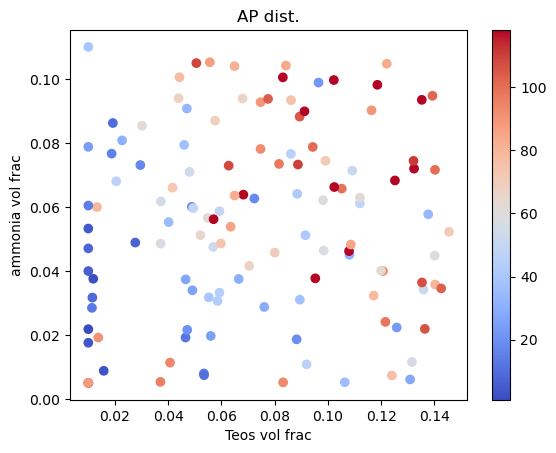

In [54]:
fig, ax = plt.subplots()

sc = ax.scatter(synth_table_apdist['teos_vol_frac'], synth_table_apdist['ammonia_vol_frac'], c = synth_table_apdist['rank'], cmap = plt.cm.coolwarm)
ax.set_xlabel('Teos vol frac')
ax.set_ylabel('ammonia vol frac')
ax.set_title('AP dist.')
cbar = fig.colorbar(sc, ax = ax)

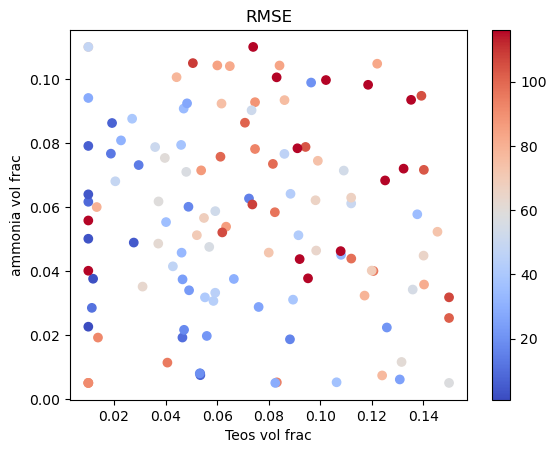

In [55]:
fig, ax = plt.subplots()

sc = ax.scatter(synth_table_rmse['teos_vol_frac'], synth_table_rmse['ammonia_vol_frac'], c = synth_table_rmse['rank'], cmap = plt.cm.coolwarm)
ax.set_xlabel('Teos vol frac')
ax.set_ylabel('ammonia vol frac')
ax.set_title('RMSE')
cbar = fig.colorbar(sc, ax = ax)

In [56]:

name_bounds_apdist = {}
for name in fp2name.values():
    name_bounds_apdist[name] = []
    count = 0
    for i, row in synth_table_apdist.iterrows():
        bounds = []
        if row['campaign'] == name:
            name_bounds_apdist[name].append(count)
        count += 1
        

In [57]:
best_distances = []
for i, row in synth_table_apdist.iterrows():
    dist = row['ap_distance']
    if len(best_distances) == 0:
        best_distances.append(dist)
    else:
        best_distances.append(min(best_distances[-1], dist))

/home/bgpelkie/miniconda3/envs/sas/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/bgpelkie/miniconda3/envs/sas/lib/python3.12/site-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


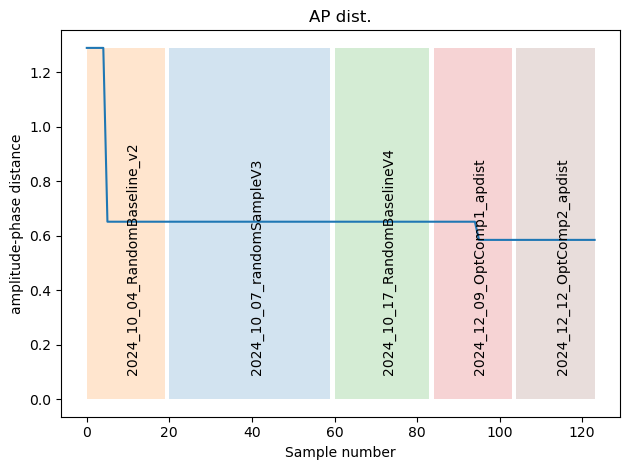

In [58]:
fig, ax = plt.subplots()

for name, bounds in name_bounds_apdist.items():
    ax.fill_between(bounds, 0, max(best_distances), alpha = 0.2)
    ax.text(np.mean(bounds), 0.1, name, rotation = 'vertical')
ax.plot(best_distances)


ax.set_xlabel('Sample number')
ax.set_ylabel('amplitude-phase distance')
ax.set_title('AP dist.')

plt.tight_layout()
#plt.savefig('Campaign_convergence_plot.png', dpi = 300)

In [59]:
# rmse
name_bounds_rmse = {}
for name in fp2name.values():
    name_bounds_rmse[name] = []
    count = 0
    for i, row in synth_table_rmse.iterrows():
        bounds = []
        if row['campaign'] == name:
            name_bounds_rmse[name].append(count)
        count += 1

In [60]:
best_distances = []
for i, row in synth_table_rmse.iterrows():
    dist = row['ap_distance']
    if len(best_distances) == 0:
        best_distances.append(dist)
    else:
        best_distances.append(min(best_distances[-1], dist))

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


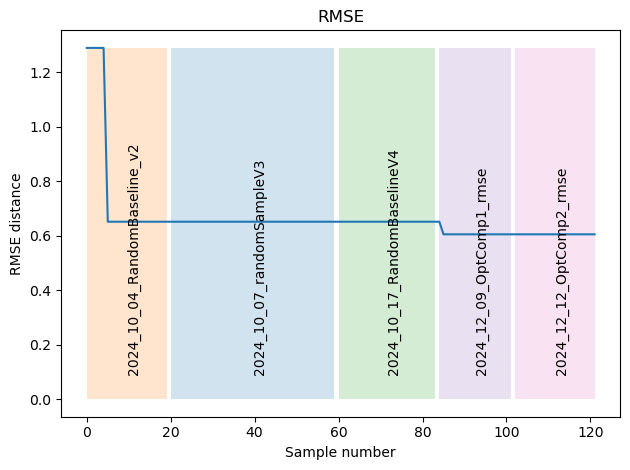

In [61]:
fig, ax = plt.subplots()

for name, bounds in name_bounds_rmse.items():
    ax.fill_between(bounds, 0, max(best_distances), alpha = 0.2)
    ax.text(np.mean(bounds), 0.1, name, rotation = 'vertical')
ax.plot(best_distances)


ax.set_xlabel('Sample number')
ax.set_ylabel('RMSE distance')
ax.set_title('RMSE')

plt.tight_layout()
#plt.savefig('Campaign_convergence_plot.png', dpi = 300)

In [62]:
synth_table_rmse

,teos_volume,ammonia_volume,water_volume,ethanol_volume,dilution_volume_fraction,silica_mass_conc,silica_mass_fraction,campaign,dilute_well,target_volume,teos_vol_frac,ammonia_vol_frac,water_vol_frac,ethanol_vol_frac,ap_distance,rmse_distance,experiment_status,rank
uuid,,,,,,,,,,,,,,,,,,
4bec4e18-80bb-44d9-8508-cc464f14b287,50.221052,124.240610,164.940826,1360.597512,0.362682,7.951422,0.009674,2024_10_04_RandomBaseline_v2,NaN,1700.0,0.029542,0.073083,0.097024,0.800351,1.290007,0.234224,complete,14.0
a180d359-a229-4b3e-a615-2991fd549f42,166.906371,105.547296,82.831240,1344.715094,0.109129,26.426030,0.032207,2024_10_04_RandomBaseline_v2,NaN,1700.0,0.098180,0.062087,0.048724,0.791009,1.550737,0.226918,complete,66.0
3584700a-8b01-4e59-a53a-1300fd3fac0a,83.477895,57.716266,175.101719,1383.704120,0.218193,13.216927,0.016085,2024_10_04_RandomBaseline_v2,NaN,1700.0,0.049105,0.033951,0.103001,0.813944,1.385839,0.240399,complete,23.0
0e6edb88-77c3-4984-a38d-198341bba9e1,190.436887,103.859345,139.812858,1265.890910,0.095645,30.151581,0.036353,2024_10_04_RandomBaseline_v2,NaN,1700.0,0.112022,0.061094,0.082243,0.744642,1.504827,0.232926,complete,50.0
68831f53-4a51-4f12-b385-10c50c8fab46,75.225504,170.914159,187.560764,1266.299573,0.242129,11.910339,0.014352,2024_10_04_RandomBaseline_v2,NaN,1700.0,0.044250,0.100538,0.110330,0.744882,1.633039,0.227138,complete,78.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45d13e36-5ae6-4aba-a657-a6cce9fb8db6,61.079639,133.803360,255.000010,1250.116991,0.621262,9.670646,0.011588,2024_12_12_OptComp2_rmse,E8,1700.0,0.035929,0.078708,0.150000,0.735363,1.504937,0.234313,complete,51.0
76e61e49-8d12-493d-aa0e-e367cf9222a1,125.772466,186.999999,49.355634,1337.871901,0.301707,19.913362,0.024338,2024_12_12_OptComp2_rmse,F1,1700.0,0.073984,0.110000,0.029033,0.786983,2.466455,1.684663,complete,116.0
cb91c3d6-d0df-437e-a504-7433689fb381,17.000000,186.999999,255.000010,1240.999991,2.232143,2.691584,0.003226,2024_12_12_OptComp2_rmse,F2,1700.0,0.010000,0.110000,0.150000,0.730000,1.500008,0.229027,complete,48.0


In [63]:
## best for campaign plot

name_distances_apdist = {}
for name in fp2name.values():
    count = 0
    for i, row in synth_table_apdist.iterrows():
        bounds = []
        if row['campaign'] == name:
            try:
               name_distances_apdist[name].append(row['ap_distance'])
            except KeyError:
                name_distances_apdist[name] = [row['ap_distance']]
        count += 1

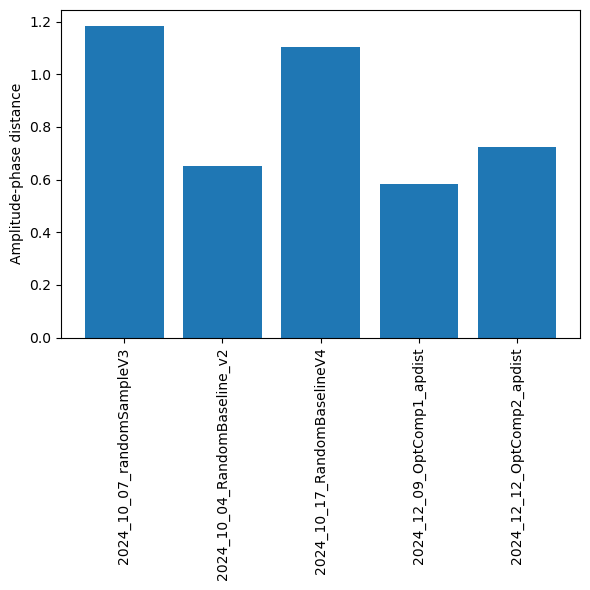

In [64]:
fig, ax = plt.subplots(figsize = (6,6))
name_distances_max = [min(distances) for distances in name_distances_apdist.values()]
ax.bar(name_distances_apdist.keys(), name_distances_max)
ax.tick_params(axis = 'x', rotation = 90)
ax.set_ylabel('Amplitude-phase distance')

plt.tight_layout()

plt.savefig('best_per_campaign.png', dpi = 300)

In [66]:
synth_table_apdist.to_csv('synth_table_12_11_24_post_apdist.csv')
synth_table_rmse.to_csv('synth_table_12_11_24_post_rmse.csv')